In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Num_try = 10000

Bandit_prob = [0.2,0.5,0.75]

In [15]:
# postrior = pretrior = beta through bernoui
class Bandit():
    def __init__(self,p): # p:winning rate- pretend not to know what these are
        self.p = p
        self.a = 1 # wining prop in beta
        self.b = 1
        self.N = 0
        
#         beta funcation has the mean = a/(a+b) with variance scaled by (1/a)
        
    def pull(self): # return a 1 with p
        return np.random.random() < self.p # random takes [0,1] randomly
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.N +=1
        self.a += x     # bernouli  # x is on average, <x> = p 
        self.b += 1 - x     # eventually, a ~ N*p, b ~ N*(1-p), thus mean~N*p/(N) = p
        
def plot_ (bandits,trial):
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)   # (x^(a-1)(1-x)^(b-1))
        plt.plot(x,y, label=f"p: {b.p:.4f}, winrate = {b.a -1}/{b.N}")
        
    plt.title(f'Dist after {trial} trials')
    plt.legend()
    plt.show()
        
def experiment():
    bandits = [Bandit(p) for p in Bandit_prob] # we don't know what are in Bandit_prob 
    rewards = np.zeros(Num_try)
    sample_pts = [5,10,20,50,100,200, 500,1000,1999]


    for i in range(Num_try):
        #Thompson sampling
        j = np.argmax([b.sample() for b in bandits])   # this will eventually be frequent in the peak of max_p beta dist
        if i in sample_pts:
            plot_(bandits,i)
        
        x = bandits[j].pull()
        
        rewards[i] = x 

        bandits[j].update(x)  # p_true is fixed
        
        
    cum_ave = np.cumsum(rewards) / (np.arange(Num_try) +1)
        
    return bandits, rewards, cum_ave
        
        

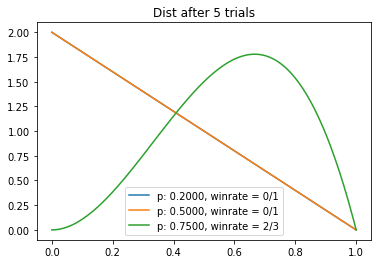

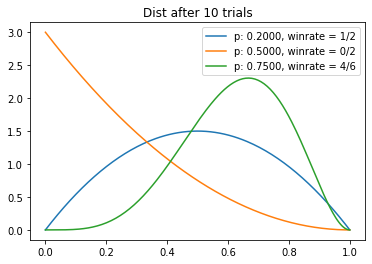

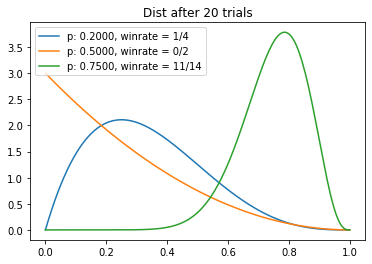

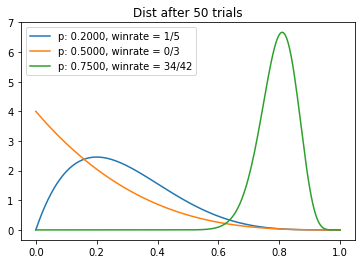

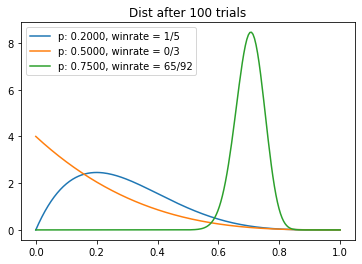

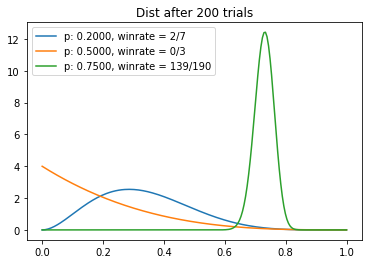

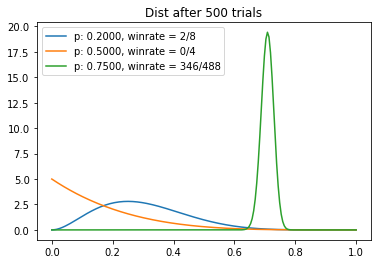

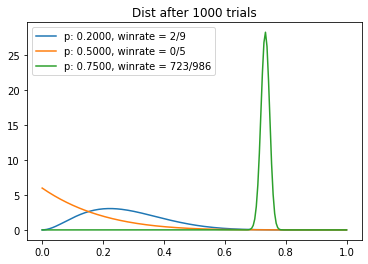

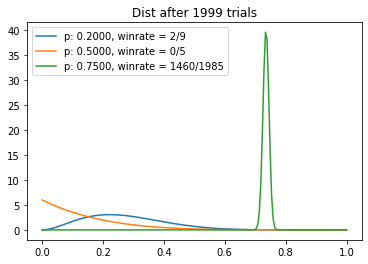

In [16]:
bandits, rewards, cum_ave = experiment()